In [95]:
import importlib
if not importlib.util.find_spec("hydesign"):
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/hydesign.git  



In [96]:

import os
import time
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hydesign.assembly.hpp_assembly import hpp_model
from hydesign.examples import examples_filepath   

In [97]:
examples_sites = pd.read_csv(f'{examples_filepath}examples_sites.csv', index_col=0, sep=';')


print(type(examples_sites))
examples_sites

<class 'pandas.core.frame.DataFrame'>


,case,name,longitude,latitude,altitude,input_ts_fn,sim_pars_fn,price_fn,price_col,H2_demand_col,input_HA_ts_fn,price_up_ts,price_dwn_ts
0,India,Indian_site_good_wind,77.500226,8.334294,679.803454,India/GWA2/input_ts_Indian_site_good_wind.csv,India/hpp_pars.yml,India/Indian_elec_price_t.csv,Price,India/H2_demand.csv,NaN,NaN,NaN
1,India,Indian_site_good_solar,68.542204,23.542099,29.883557,India/GWA2/input_ts_Indian_site_good_solar.csv,India/hpp_pars.yml,India/Indian_elec_price_t.csv,Price,India/H2_demand.csv,NaN,NaN,NaN
2,India,Indian_site_bad_solar_bad_wind,77.916878,17.292316,627.424643,India/GWA2/input_ts_Indian_site_bad_solar_bad_...,India/hpp_pars.yml,India/Indian_elec_price_t.csv,Price,India/H2_demand.csv,NaN,NaN,NaN
3,Europe,France_good_solar,4.229736,44.422011,204.000000,Europe/GWA2/input_ts_France_good_solar.csv,Europe/hpp_pars.yml,Europe/2030-EL_PRICE.csv,FR_R,Europe/H2_demand.csv,NaN,NaN,NaN
4,Europe,France_good_wind,-0.864258,48.744116,302.000000,Europe/GWA2/input_ts_France_good_wind.csv,Europe/hpp_pars.yml,Europe/2030-EL_PRICE.csv,FR_R,Europe/H2_demand.csv,NaN,NaN,NaN
5,Europe,France_bad_solar_n_wind,2.167969,47.428087,140.000000,Europe/GWA2/input_ts_France_bad_solar_n_wind.csv,Europe/hpp_pars.yml,Europe/2030-EL_PRICE.csv,FR_R,Europe/H2_demand.csv,NaN,NaN,NaN
6,Europe,Germany_bad_solar_n_wind,10.766602,49.310798,442.000000,Europe/GWA2/input_ts_Germany_bad_solar_n_wind.csv,Europe/hpp_pars.yml,Europe/2030-EL_PRICE.csv,DE_ME,Europe/H2_demand.csv,NaN,NaN,NaN
7,Europe,Germany_good_wind,7.873535,53.287111,5.000000,Europe/GWA2/input_ts_Germany_good_wind.csv,Europe/hpp_pars.yml,Europe/2030-EL_PRICE.csv,DE_NW,Europe/H2_demand.csv,NaN,NaN,NaN
8,Europe,Denmark_good_solar,11.813965,55.397760,42.000000,Europe/GWA2/input_ts_Denmark_good_solar.csv,Europe/hpp_pars.yml,Europe/2030-EL_PRICE.csv,DK_E,Europe/H2_demand.csv,NaN,NaN,NaN
9,Europe,Denmark_good_wind,8.594398,56.227322,85.000000,Europe/GWA2/input_ts_Denmark_good_wind.csv,Europe/hpp_pars.yml,Europe/2030-EL_PRICE.csv,DK_W,Europe/H2_demand.csv,NaN,NaN,NaN


In [98]:
name = 'Marijampole'
ex_site = examples_sites.loc[examples_sites.name == name]

longitude = ex_site['longitude'].values[0]
latitude = ex_site['latitude'].values[0]
altitude = ex_site['altitude'].values[0]

input_ts_fn = examples_filepath+ex_site['input_ts_fn'].values[0]
sim_pars_fn = examples_filepath+ex_site['sim_pars_fn'].values[0]

In [99]:
hpp = hpp_model(
        latitude=latitude,
        longitude=longitude,
        altitude=altitude,
        num_batteries = 5,
        work_dir = './',
        sim_pars_fn = sim_pars_fn,
        input_ts_fn = input_ts_fn,
)


Fixed parameters on the site
-------------------------------
longitude = 23.348694
latitude = 54.556137
altitude = 73.0


C:\Users\escho\AppData\Local\Temp\ipykernel_2312\3445215377.py:92: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  NPV_CAPEX[q-1] = design_df['NPV_over_CAPEX']
C:\Users\escho\AppData\Local\Temp\ipykernel_2312\3445215377.py:92: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  NPV_CAPEX[q-1] = design_df['NPV_over_CAPEX']
C:\Users\escho\AppData\Local\Temp\ipykernel_2312\3445215377.py:92: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  NPV_CAPEX[q-1] = design_df['NPV_over_CAPEX']
C:\Users\escho\AppData\Local\Temp\ipykernel_2312\3445215377.py:92: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  NPV_CAPEX[q-1] = 

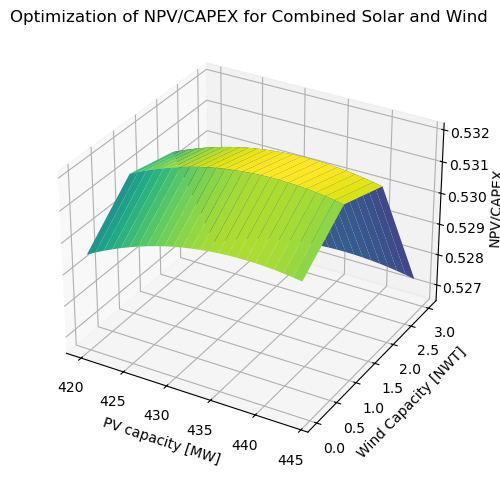

Solar MW: [420. 421. 422. 423. 424. 425. 426. 427. 428. 429. 430. 431. 432. 433.
 434. 435. 436. 437. 438. 439. 440. 441. 442. 443. 444.]
NWT: [0. 1. 2. 3.]


In [101]:
from mpl_toolkits.mplot3d import Axes3D  # kræves for 3D plotting
n = 4
k = 25
q = 0 

NPV_CAPEX = np.zeros(n*k)
MW = np.zeros(k)
NWT = np.zeros(n)
test_start_val_wind = 0
test_start_val_solar = 420 
# Importér nødvendige moduler til 3D-plot
from mpl_toolkits.mplot3d import Axes3D  # kræves for 3D plotting


random = list(i for i in range(n*k))

for i in range(n):
    for j in range(k):
        q += 1 
        clearance = 10
        sp = 350
        p_rated = 5
        Nwt = test_start_val_wind + (i)
        wind_MW_per_km2 = 7
        solar_MW = test_start_val_solar + (j)
        surface_tilt = 50
        surface_azimuth = 180
        solar_DCAC = 1.5
        b_P = 0
        b_E_h  = 3
        cost_of_batt_degr = 10

        x = [clearance, sp, p_rated, Nwt, wind_MW_per_km2, \
        solar_MW, surface_tilt, surface_azimuth, solar_DCAC, \
        b_P, b_E_h , cost_of_batt_degr]

        outs = hpp.evaluate(*x)

        # hpp.print_design(x, outs)

        design_df = pd.DataFrame(columns = ['clearance [m]',
                                                'sp [W/m2]',
                                                'p_rated [MW]',
                                                'Nwt',
                                                'wind_MW_per_km2 [MW/km2]',
                                                'solar_MW [MW]',
                                                'surface_tilt [deg]',
                                                'surface_azimuth [deg]',
                                                'DC_AC_ratio',
                                                'b_P [MW]',
                                                'b_E_h [h]',
                                                'cost_of_battery_P_fluct_in_peak_price_ratio',
                                                'NPV_over_CAPEX',
                                                'NPV [MEuro]',
                                                'IRR',
                                                'LCOE [Euro/MWh]',
                                                'Revenues [MEuro]',
                                                'CAPEX [MEuro]',
                                                'OPEX [MEuro]',
                                                'Wind CAPEX [MEuro]',
                                                'Wind OPEX [MEuro]',
                                                'PV CAPEX [MEuro]',
                                                'PV OPEX [MEuro]',
                                                'Batt CAPEX [MEuro]',
                                                'Batt OPEX [MEuro]',
                                                'Shared CAPEX [MEuro]',
                                                'Shared OPEX [MEuro]',
                                                'penalty lifetime [MEuro]',
                                                'AEP [GWh]',
                                                'GUF',
                                                'grid [MW]',
                                                'wind [MW]',
                                                'solar [MW]',
                                                'Battery Energy [MWh]',
                                                'Battery Power [MW]',
                                                'Total curtailment [GWh]',
                                                'Total curtailment with deg [GWh]',
                                                
                                                'Awpp [km2]',
                                                'Apvp [km2]',
                                                'Plant area [km2]',
                                                'Rotor diam [m]',
                                                'Hub height [m]',
                                                'Number of batteries used in lifetime',
                                                'Break-even PPA price [Euro/MWh]',
                                                'Capacity factor wind [-]',
                                                
                                                ]  , index=range(1))
        design_df.iloc[0] =  list(x) + list(outs) 
        

        NPV_CAPEX[q-1] = design_df['NPV_over_CAPEX'] 
        MW[j] = solar_MW
        
        # MW[j] = test_start_val_solar + (j)        
        # NPV_CAPEX[q-1] = random[q-1]
   
    NWT[i] = Nwt 

# Antag at n (fx antal windscenarier) og k (fx antal solscenarier) er defineret
# og at NPV_CAPEX har størrelse n*k. Omform NPV_CAPEX til en 2D-matrix:
NPV_matrix = np.reshape(NPV_CAPEX, (n, k))

# Brug unikke værdier af MW (antager MW repræsenterer solcellekapacitet) og NWT (vindkapacitet)
solar = np.unique(MW)     # dimension: k elementer
wind = np.unique(NWT)     # dimension: n elementer

# Opret et meshgrid
Solar_mesh, Wind_mesh = np.meshgrid(solar, wind)

# Opret 3D-figuren
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Solar_mesh, Wind_mesh, NPV_matrix, cmap='viridis')

ax.set_xlabel('PV capacity [MW]')
ax.set_ylabel('Wind Capacity [NWT]')
ax.set_zlabel('NPV/CAPEX')
plt.title('Optimization of NPV/CAPEX for Combined Solar and Wind')
# plt.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.savefig("3d_plot.png")  # gemmer 3D-plottet i samme mappe
plt.show()

# plt.plot(MW, NPV_CAPEX,'-o')
# plt.xlabel('NWT')
# plt.ylabel('NPV/CAPEX')
# plt.title(f'NPV/CAPEX in relation to WPP sizing')
# plt.grid()
# plt.tight_layout()
# plt.savefig("plot.png")
# plt.show()

# print(f'NPV/CAPEX: {NPV_CAPEX}')
# print(f'NWT: {MW}')
print(f'Solar MW: {MW}')
print(f'NWT: {NWT}')




In [102]:
max_NPV_CAPEX = np.max(NPV_CAPEX)
max_index = np.argmax(NPV_CAPEX)
print(f'Max NPV/CAPEX: {max_NPV_CAPEX} at index {max_index}')

print(NPV_CAPEX)


Max NPV/CAPEX: 0.5320940908953491 at index 42
[0.52954744 0.52969197 0.5298272  0.52995409 0.53007278 0.530182
 0.53028247 0.53037338 0.53045711 0.53053332 0.53059963 0.5306576
 0.53070639 0.53074831 0.53078319 0.53081    0.53082797 0.53083739
 0.53084089 0.53083646 0.53082547 0.53080564 0.53077747 0.53074274
 0.53070134 0.53099728 0.53112924 0.53125228 0.53136648 0.53147207
 0.53156857 0.53165681 0.53173638 0.53180847 0.53187288 0.53192786
 0.53197466 0.53201343 0.53204477 0.53206938 0.53208591 0.53209381
 0.53209409 0.53208713 0.53207336 0.53205221 0.53202283 0.53198608
 0.53194226 0.53189218 0.53065249 0.53077483 0.53088844 0.53099303
 0.53109023 0.53117873 0.53125879 0.53133059 0.53139468 0.53145081
 0.53149794 0.53153784 0.53156979 0.53159447 0.53161194 0.5316213
 0.53162234 0.53161657 0.53160359 0.53158366 0.53155616 0.53152091
 0.53147827 0.53142889 0.53137328 0.52658933 0.52670994 0.52682125
 0.52692425 0.52702006 0.52710735 0.52718662 0.5272572  0.52731976
 0.52737544 0.527422

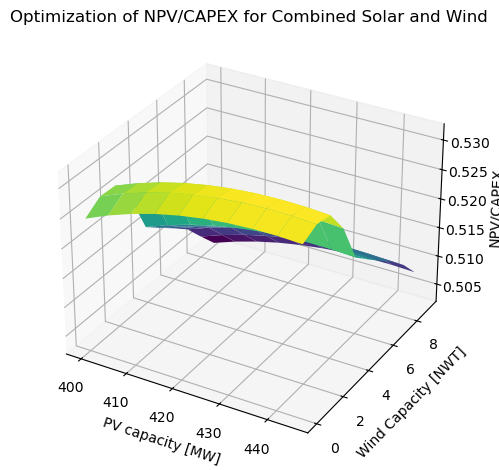

In [ ]:
#71/438 0.357302449390809
#70/437 0.36047169391554174
#69/436 0.35241145038095223

# Max NPV/CAPEX: 0.5320859062348365 at index 17

# 3D plot af NPV/CAPEX for kombineret sol og vind

# NPV_CAPEX_1 = np.array([0.52454926, 0.52619193, 0.52756907, 0.52868381, 0.52954744, 0.530182,
#  0.53059963, 0.53081, 0.53082547, 0.53065311, 0.52631365, 0.52786913,
#  0.52916559, 0.53020352, 0.53099728, 0.53156857, 0.53192786, 0.53208591,
#  0.53205221, 0.53183447, 0.5262014, 0.52769173, 0.52892586, 0.52990829,
#  0.53065249, 0.53117873, 0.53149794, 0.5316213, 0.53155616, 0.53131031,
#  0.52222005, 0.5236825, 0.52489299, 0.52585864, 0.52658933, 0.52710735,
#  0.52742258, 0.52754541, 0.52748257, 0.52724303, 0.51527981, 0.51674307,
#  0.51795899, 0.51893463, 0.51967932, 0.52021608, 0.52055315, 0.52070026,
#  0.52066538, 0.5204559, 0.51316264, 0.5145826, 0.51575905, 0.51670064,
#  0.51741673, 0.51793009, 0.51824679, 0.51837669, 0.51832898, 0.51810912,
#  0.51111603, 0.51249218, 0.51363134, 0.51453985, 0.51522843, 0.51571765,
#  0.51601405, 0.5161268, 0.51606531, 0.51583512, 0.50894897, 0.51040247,
#  0.51157166, 0.51244779, 0.51310906, 0.51357426, 0.51385047, 0.51394706,
#  0.51387168, 0.5136302, 0.50567476, 0.50709383, 0.50828435, 0.50925216,
#  0.510008, 0.5105691, 0.51094401, 0.51114177, 0.51116751, 0.51102901,
#  0.50251201, 0.50389685, 0.50505938, 0.50600263, 0.50673784, 0.50728214,
#  0.50764399, 0.50783055, 0.50784902, 0.5077038 ])

# # Max NPV/CAPEX: 0.5320859062348365 at index 17
# # svarende til 435MW sol og 1 vindmølle

# NPV_matrix = np.reshape(NPV_CAPEX_1, (n, k))

# # Brug unikke værdier af MW (antager MW repræsenterer solcellekapacitet) og NWT (vindkapacitet)
# solar = np.unique(MW)     # dimension: k elementer
# wind = np.unique(NWT)     # dimension: n elementer

# # Opret et meshgrid
# Solar_mesh, Wind_mesh = np.meshgrid(solar, wind)

# # Opret 3D-figuren
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(Solar_mesh, Wind_mesh, NPV_matrix, cmap='viridis')

# ax.set_xlabel('PV capacity [MW]')
# ax.set_ylabel('Wind Capacity [NWT]')
# ax.set_zlabel('NPV/CAPEX')
# plt.title('Optimization of NPV/CAPEX for Combined Solar and Wind')
# # plt.colorbar(surf, shrink=0.5, aspect=5)

# plt.tight_layout()
# plt.savefig("3d_plot.png")  # saves the 3D plot in the same folder
# plt.show()


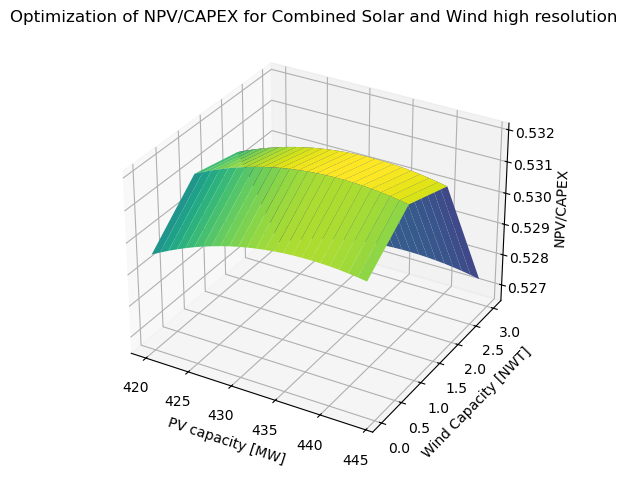

In [104]:
# Gemmer 3D-plottet i samme mappe

# 3D plot af NPV/CAPEX for kombineret sol og vind

NPV_CAPEX_2 = np.array([0.52954744, 0.52969197, 0.5298272,  0.52995409, 0.53007278, 0.530182,
 0.53028247, 0.53037338, 0.53045711, 0.53053332, 0.53059963, 0.5306576,
 0.53070639, 0.53074831, 0.53078319, 0.53081, 0.53082797, 0.53083739,
 0.53084089, 0.53083646, 0.53082547, 0.53080564, 0.53077747, 0.53074274,
 0.53070134, 0.53099728, 0.53112924, 0.53125228, 0.53136648, 0.53147207,
 0.53156857, 0.53165681, 0.53173638, 0.53180847, 0.53187288, 0.53192786,
 0.53197466, 0.53201343, 0.53204477, 0.53206938, 0.53208591, 0.53209381,
 0.53209409, 0.53208713, 0.53207336, 0.53205221, 0.53202283, 0.53198608,
 0.53194226, 0.53189218, 0.53065249, 0.53077483, 0.53088844, 0.53099303,
 0.53109023, 0.53117873, 0.53125879, 0.53133059, 0.53139468, 0.53145081,
 0.53149794, 0.53153784, 0.53156979, 0.53159447, 0.53161194, 0.5316213,
 0.53162234, 0.53161657, 0.53160359, 0.53158366, 0.53155616, 0.53152091,
 0.53147827, 0.53142889, 0.53137328, 0.52658933, 0.52670994, 0.52682125,
 0.52692425, 0.52702006, 0.52710735, 0.52718662, 0.5272572, 0.52731976,
 0.52737544, 0.52742258, 0.52746232, 0.52749402, 0.5275183, 0.52753549,
 0.52754541, 0.52754684, 0.52754107, 0.52752839, 0.5275089, 0.52748257,
 0.52744856, 0.52740688, 0.5273587, 0.52730468])

# Max NPV/CAPEX: 0.5320940908953495 at index 42
# svarende til 436MW sol og 1 vindmølle

NPV_matrix = np.reshape(NPV_CAPEX_2, (n, k))

# Brug unikke værdier af MW (antager MW repræsenterer solcellekapacitet) og NWT (vindkapacitet)
solar = np.unique(MW)     # dimension: k elementer
wind = np.unique(NWT)     # dimension: n elementer

# Opret et meshgrid
Solar_mesh, Wind_mesh = np.meshgrid(solar, wind)

# Opret 3D-figuren
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Solar_mesh, Wind_mesh, NPV_matrix, cmap='viridis')

ax.set_xlabel('PV capacity [MW]')
ax.set_ylabel('Wind Capacity [NWT]')
ax.set_zlabel('NPV/CAPEX')
plt.title('Optimization of NPV/CAPEX for Combined Solar and Wind high resolution')
# plt.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.savefig("3d_plot.png")  # saves the 3D plot in the same folder
plt.show()

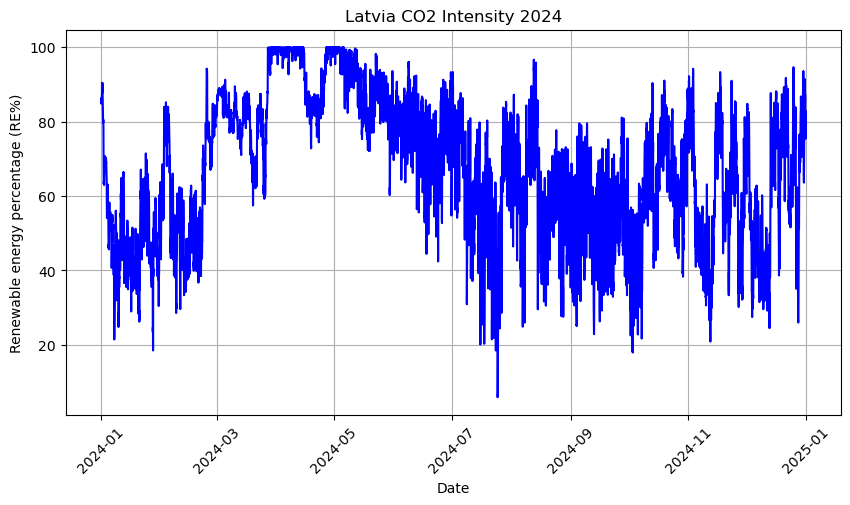

,Carbon intensity gCO₂eq/kWh (direct),Carbon intensity gCO₂eq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data estimation method
count,8784.000000,8784.000000,8784.000000,8784.000000,0.0
mean,130.487970,181.342895,73.878369,67.362881,NaN
std,79.372621,95.209897,17.774705,19.363554,NaN
min,0.000000,15.790000,5.970000,5.920000,NaN
25%,66.757500,106.655000,59.650000,52.085000,NaN
50%,123.640000,172.375000,78.205000,68.935000,NaN
75%,191.880000,256.102500,87.932500,82.750000,NaN
max,431.610000,508.460000,100.000000,100.000000,NaN


In [109]:
df_latvia_corbon_intensity = pd.read_csv('LV_2024_hourly.csv', index_col=0, parse_dates=True)

plt.figure(figsize=(10, 5))
plt.plot(df_latvia_corbon_intensity.index, df_latvia_corbon_intensity['Renewable energy percentage (RE%)'], label='Latvia CO2 Intensity', color='blue')
plt.xlabel('Date')
plt.ylabel('Renewable energy percentage (RE%)')
plt.title('Latvia CO2 Intensity 2024')
plt.xticks(rotation=45)
plt.grid()
plt.show()

df_latvia_corbon_intensity.describe()

